## Exercise 1: Download and Inspect the Models

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [63]:
import gensim.downloader as api

wiki = api.load('glove-wiki-gigaword-50')
twit = api.load('glove-twitter-50')

In [85]:
# dir(twit)

In [5]:
print(f"Wikipedia model has {wiki.vectors.shape[0]:,} words and {wiki.vectors.shape[1]} embedding dimensions.")
print(f"Twiter model has {twit.vectors.shape[0]:,} words and {twit.vectors.shape[1]} embedding dimensions.")

Wikipedia model has 400,000 words and 50 embedding dimensions.
Twiter model has 1,193,514 words and 50 embedding dimensions.


## Exercise 2: Visualize the Embeddings for one word

In [6]:
word = "melon"

wiki_wordidx = wiki.get_index(word)
twit_wordidx = twit.get_index(word)

print(f"The index of word '{word}' in Wikipedia model is {wiki_wordidx}.")
print(f"The index of word '{word}' in Twitter model is {twit_wordidx}.")

The index of word 'melon' in Wikipedia model is 32802.
The index of word 'melon' in Twitter model is 20287.


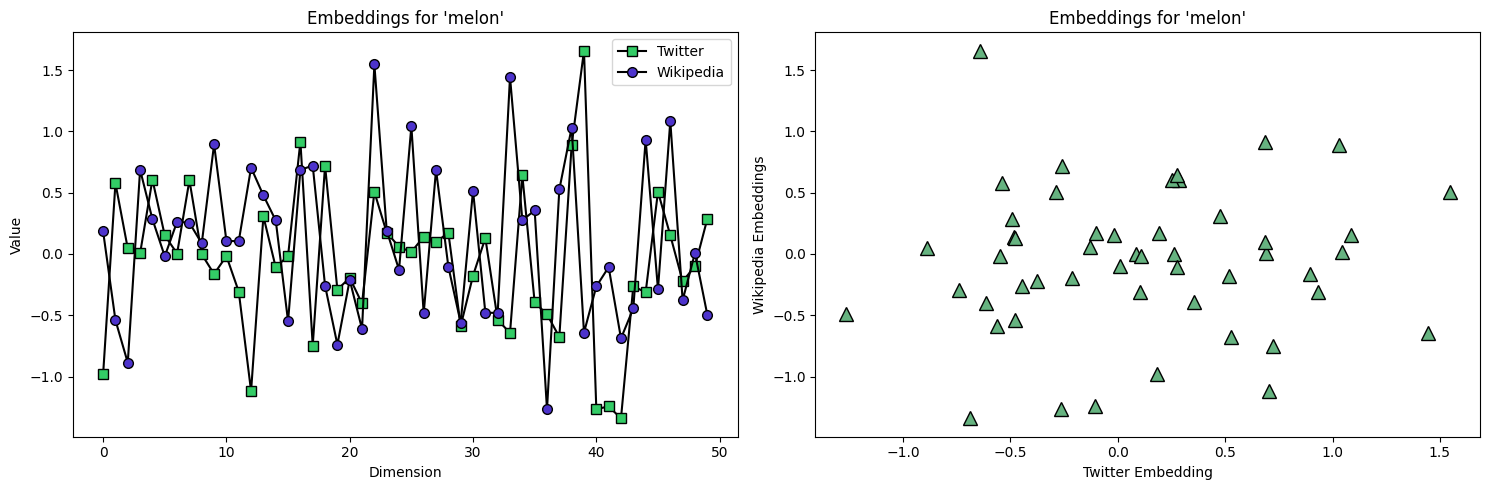

In [7]:


fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(twit[word],"sk-",markersize=7,markerfacecolor=[.2,.8,.4],label="Twitter")
ax[0].plot(wiki[word],"ok-",markersize=7,markerfacecolor=[.3,.2,.8],label="Wikipedia")
ax[0].legend()
ax[0].set(xlabel="Dimension",ylabel="Value",title=f"Embeddings for '{word}'")

ax[1].plot(wiki[word],twit[word],"^k",markersize=10,markerfacecolor=[.4,.7,.5])
ax[1].set(xlabel="Twitter Embedding",ylabel="Wikipedia Embeddings",title=f"Embeddings for '{word}'")

plt.tight_layout()
plt.show()


## Exercise 3: Embeddings for Word Pairs Within Each Model

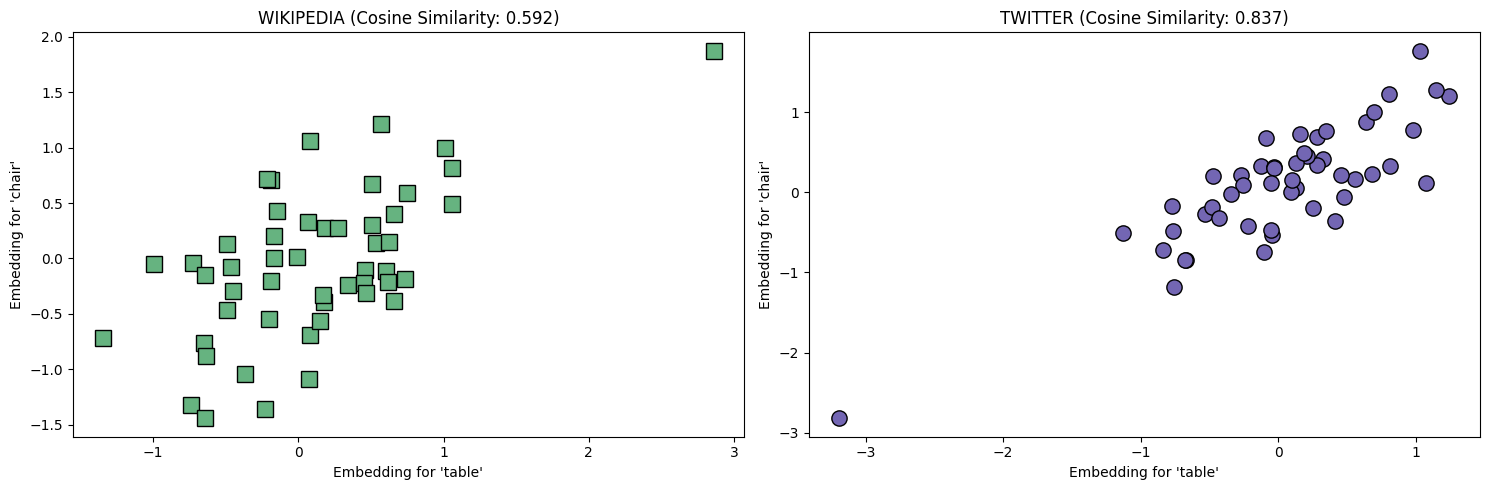

In [8]:
word1 = "table"
word2 = "chair"

fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(wiki[word1],wiki[word2],"sk",markersize=11,markerfacecolor=[.4,.7,.5])
ax[0].set(xlabel="Embedding for 'table'",ylabel="Embedding for 'chair'",title=f"WIKIPEDIA (Cosine Similarity: {wiki.similarity(word1,word2):.3f})")

ax[1].plot(twit[word1],twit[word2],"ok",markersize=11,markerfacecolor=[.45,.4,.7])
ax[1].set(xlabel="Embedding for 'table'",ylabel="Embedding for 'chair'",title=f"TWITTER (Cosine Similarity: {twit.similarity(word1,word2):.3f})")

plt.tight_layout()
plt.show()

## Exercise 4: Similar Words Within Each Model

In [9]:
target_word = "machine"

twit_mostSim10 = twit.most_similar(target_word,topn=10)
wiki_mostSim10 = wiki.most_similar(target_word,topn=10)

print(f"10 words most similar to '{target_word}' in Twitter model:")
for word,sim in twit_mostSim10:
    print(f"\t\t\t{word:>11} with similarity {sim:.4f}")

print(f"\n\n10 words most similar to '{target_word}' in Wikipedia model:")
for word,sim in wiki_mostSim10:
    print(f"\t\t\t{word:>11} with similarity {sim:.4f}")

10 words most similar to 'machine' in Twitter model:
			      maker with similarity 0.8371
			   machines with similarity 0.7971
			     system with similarity 0.7909
			      speed with similarity 0.7818
			        box with similarity 0.7770
			      power with similarity 0.7735
			      works with similarity 0.7734
			      range with similarity 0.7720
			       pack with similarity 0.7626
			      wheel with similarity 0.7614


10 words most similar to 'machine' in Wikipedia model:
			   machines with similarity 0.8239
			     device with similarity 0.8176
			      using with similarity 0.7790
			        gun with similarity 0.7509
			       used with similarity 0.7493
			    devices with similarity 0.7369
			       uses with similarity 0.7261
			   portable with similarity 0.7247
			  automatic with similarity 0.7220
			     drives with similarity 0.7156


## Exercise 5: Foxes and Dogs

In [10]:
text = "The quick brown fox jumps over the lazy dog"

In [23]:
text = text.lower()
words = list(set(re.split(" ",text)))
words

['quick', 'dog', 'jumps', 'over', 'the', 'lazy', 'brown', 'fox']

In [40]:
print("|  Word   | Twitter  | Wikipedia |\n"+"-"*34)

for w in words:
    
    t_idx = twit.get_index(w)
    w_idx = wiki.get_index(w)

    print(f"| {w:>6}  |  {t_idx:>6}  |  {w_idx:>7}  |")

print("-"*34)



|  Word   | Twitter  | Wikipedia |
----------------------------------
|  quick  |    2156  |     2582  |
|    dog  |    1317  |     2926  |
|  jumps  |   18014  |    11070  |
|   over  |     254  |       74  |
|    the  |      13  |        0  |
|   lazy  |    2222  |    16531  |
|  brown  |    1871  |     1042  |
|    fox  |    4000  |     2106  |
----------------------------------


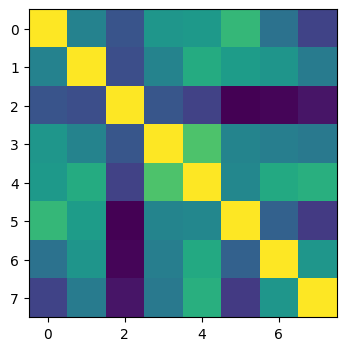

In [58]:
similarities = np.zeros( (len(words),len(words),2) )

for idx1,w1 in enumerate(words):
    for idx2,w2 in enumerate(words):

        t_cosSim = twit.similarity(w1,w2)
        w_cosSim = wiki.similarity(w1,w2)

        similarities[idx1,idx2,0] = t_cosSim 
        similarities[idx1,idx2,1] = w_cosSim

plt.figure(figsize=(4,4))
plt.imshow(similarities[:,:,0])
plt.show()


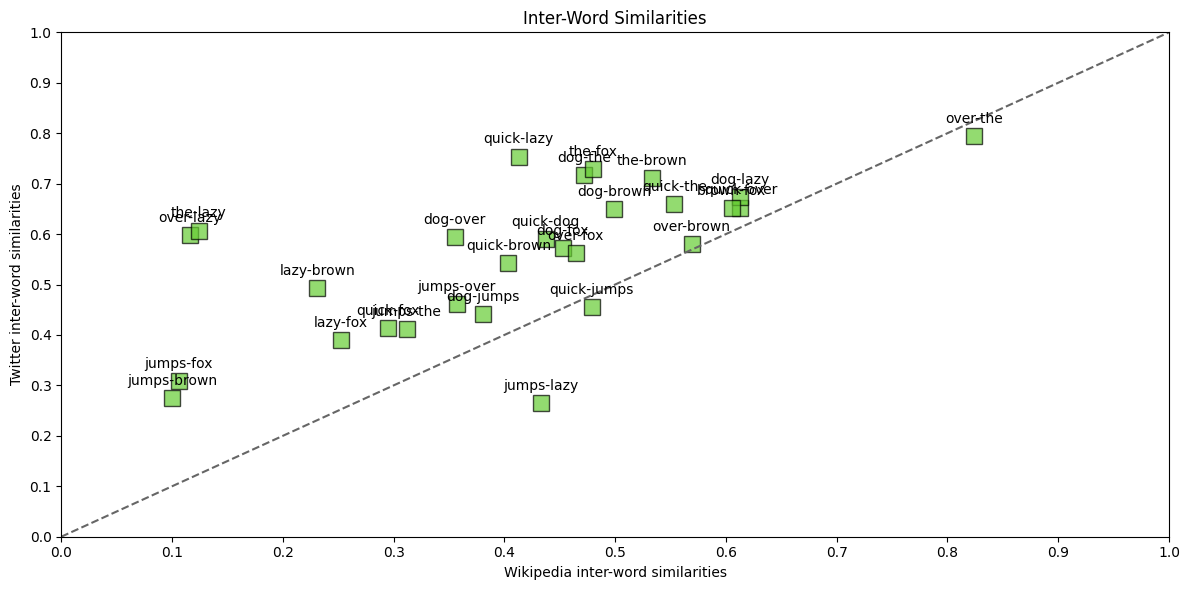

In [114]:
plt.figure(figsize=(12,6))

for col in range(8):
    for row in range(col+1,8):
        plt.plot(similarities[row,col,1],similarities[row,col,0],"sk",markersize="12",alpha=.7,markerfacecolor=[.4,.8,.2])
        plt.text(similarities[row,col,1],similarities[row,col,0]+.02,f"{words[col]}-{words[row]}",va="bottom",ha="center")

xylims = [0,1]
plt.plot(xylims,xylims,'--',color=[.4,.4,.4])
        
plt.gca().set(xticks=np.arange(0, 1.1, 0.1),yticks=np.arange(0, 1.1, 0.1),xlabel="Wikipedia inter-word similarities",ylabel="Twitter inter-word similarities",title="Inter-Word Similarities",xlim=(0,1),ylim=(0,1))
plt.tight_layout()
plt.show()